# Partially Linear Fast-Reaction System 1

In [1]:
using TUMProject
using DifferentialEquations

### Define grid

In [2]:
r = 50
n = (2*r + 1)
N = n^2
grid = uniform2dgrid(-r:r,-r:r)
operator = laplace2dpbc(grid)  

Laplace Operator with periodic boundary condtions


### Set up initial condtions

In [3]:
u0 = zeros(Float32, (n,n))
v0 = zeros(Float32, (n,n))
u0[r:2*r-1,r:2*r-1] .= 1f0
u0[3:r,3:r] .= 1f0
v0[2:2*r-1,r+1:2*r-1] .= 1f0;
#plotinitialconditions(u0, v0, "u0", "v0")

### Inserting a non linearity in g

Now we choose u² instead of u and use cube root of v

In [4]:
f(u,v) = -u + v/2
g(u,v) = 2*u - 3*v^3
D_u = 200.5
D_v = 100.4
eps = 0.5
system = fastreactionsystem(operator, f, g, D_u, D_v, eps)
h(v) = v/2
limitsystem = fastreactionlimitsystem(operator, h, g, D_v)

Limit System of Fast-Reaction-System


### Solve the systems and plot solutions

We first integrate the limit system.

In [5]:
tol=0.2e-6
T_max = 5
tspan = (0.0, T_max)
limitprob = ODEProblem(limitsystem, reshape(v0, :) , tspan, N)
limitsol = solve(limitprob, Tsit5(), reltol=tol, abstol=1e-6*tol)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 1736-element Vector{Float64}:
 0.0
 4.025345035074679e-8
 7.626714503428616e-8
 1.1455603111358015e-7
 1.5972954130522154e-7
 2.1748959182799215e-7
 2.981024057872934e-7
 4.1198343273367556e-7
 5.461982696797383e-7
 7.134663341632665e-7
 9.080571921572594e-7
 1.1535426069358448e-6
 1.4502900436478418e-6
 ⋮
 4.967423335102016
 4.9704340910218665
 4.973438306049205
 4.976452439364413
 4.979470072131683
 4.982468481157158
 4.985486339532082
 4.988503376805808
 4.991501277935148
 4.9945101760986566
 4.9975159057189416
 5.0
u: 1736-element Vector{Vector{Float32}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [4.4462144f-23, 1.1001562f-17, 1.10016f-17, 1.10016f-17, 1.10016f-17, 1.10016f-17, 1.10016f-17, 1.10016f-17, 1.10016f-17, 1.10016f-17  …  8.166567f-12, 8.166567f-12, 8.166567f-12, 8.166567f-12, 8.166567f-12, 8.166567f-12, 8.166567f-12, 8.1665456f-12,

In [6]:
ulimit(t) = reshape( h.(limitsol(t)), n, n )
vlimit(t) = reshape( limitsol(t), n, n )
ts = tspan[1]:0.01:tspan[2]
#animatesystem( ulimit, vlimit ,"ulimit", "vlimit", ts, [0.0, 1.0], "partiallylinearlimitsystem1", 25.0)

0.0:0.01:5.0

u and v behave almost identically since u=h=v/2.

In [7]:
prob = ODEProblem(system, [ reshape(u0, :); reshape(v0, :) ], tspan, N)
sol = solve(prob, Tsit5(), reltol=tol, abstol=1e-6*tol)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 2893-element Vector{Float64}:
 0.0
 2.259637454926633e-8
 4.0140298035014764e-8
 6.03873163249845e-8
 8.538268788381299e-8
 1.1734646090925765e-7
 1.5737370520881658e-7
 2.060439826886715e-7
 2.6598747112860416e-7
 3.444062017483127e-7
 4.4368093122606447e-7
 5.550669574803414e-7
 6.997513983902186e-7
 ⋮
 4.98142297526943
 4.98319608650246
 4.984971445768313
 4.98674488035864
 4.988516350803473
 4.9902872577995465
 4.9920576295861006
 4.993829570931056
 4.995599207780089
 4.997373853387356
 4.99914997634318
 5.0
u: 2893-element Vector{Vector{Float32}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [1.05328456f-22, 4.6496835f-17, 1.0262895f-11, 1.0262944f-11, 1.0262944f-11, 1.0262944f-11, 1.0262944f-11, 1.0262944f-11, 1.0262944f-11, 1.0262944f-11  …  2.5734332f-12, 2.5734332f-12, 2.5734332f-12, 2.5734332f-12, 2.5734332f-12, 2.5734332f-12, 2.5734332f-1

In [8]:
u(t) = reshape( sol(t)[1:N], n, n)
v(t) = reshape( sol(t)[N+1:2N], n, n)
#animatesystem( u, v ,"u","v", ts, [0.0, 1.0], "partiallylinearsystem1a", 25.0)

v (generic function with 1 method)

### Compare the convergence in L_2 norm

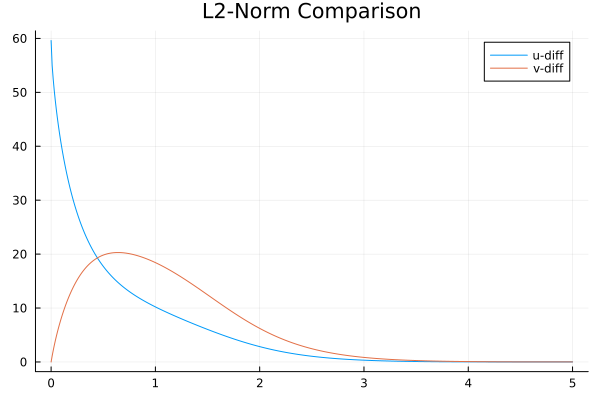

In [9]:
p = 2.0
plotcomparenorms(u, ulimit, v, vlimit, p, ts, "u-diff", "v-diff")

### Decresing Epsilon

In order to compare how a change in epsilon has an influence on the convergence we take a smaller eps value then before.

In [10]:
eps2 = 0.1
system2 = fastreactionsystem(operator, f, g, D_u, D_v, eps2)

Fast-Reaction-System


In [11]:
tol=0.2e-6
prob2 = ODEProblem(system2, [ reshape(u0, :); reshape(v0, :) ], tspan, N)
sol2 = solve(prob2, Tsit5(), reltol=tol, abstol=1e-6*tol)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 2910-element Vector{Float64}:
 0.0
 2.247103125796457e-8
 4.046946827151908e-8
 6.272927780478815e-8
 8.863938835939987e-8
 1.230913718835033e-7
 1.615355805144307e-7
 2.1194693323895697e-7
 2.684455165702183e-7
 3.3960776728772895e-7
 4.298705347141906e-7
 5.301294544652704e-7
 6.60451526684479e-7
 ⋮
 4.982209725511362
 4.983973093798646
 4.985733544164162
 4.987497512327077
 4.989262294128395
 4.9910264929534724
 4.992787261802593
 4.9945501990671035
 4.996313985360327
 4.998079149404374
 4.999842692779547
 5.0
u: 2910-element Vector{Vector{Float32}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [1.0301128f-22, 4.572736f-17, 1.0149362f-11, 1.0149434f-11, 1.0149434f-11, 1.0149434f-11, 1.0149434f-11, 1.0149434f-11, 1.0149434f-11, 1.0149434f-11  …  2.5449647f-12, 2.5449647f-12, 2.5449647f-12, 2.5449647f-12, 2.5449647f-12, 2.5449647f-12, 2.5449647f-12

In [13]:
u2(t) = reshape( sol2(t)[1:N], n, n)
v2(t) = reshape( sol2(t)[N+1:2N], n, n)
#animatesystem( u2, v2 ,"u","v", ts, [0.0, 1.0], "partiallylinearsystem1b", 25.0 )

v2 (generic function with 1 method)

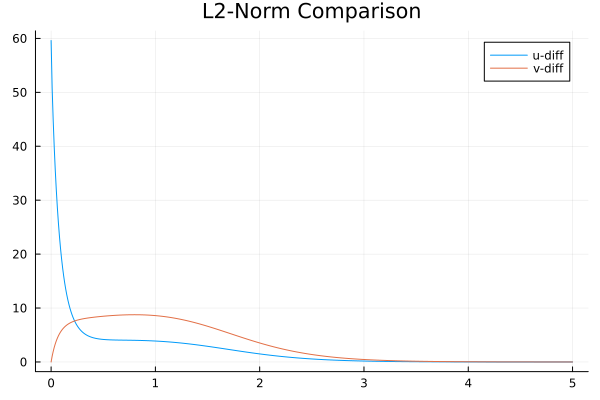

In [14]:
plotcomparenorms(u2, ulimit, v2, vlimit, p, ts, "u-diff", "v-diff")

### Decresing Epsilon further

In [15]:
eps2 = 0.01
system2 = fastreactionsystem(operator, f, g, D_u, D_v, eps2)

Fast-Reaction-System


In [16]:
tol = 0.2e-6
prob2 = ODEProblem(system2, [ reshape(u0, :); reshape(v0, :) ], tspan, N)
sol2 = solve(prob2, Tsit5(), reltol=tol, abstol=1e-6*tol)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 3093-element Vector{Float64}:
 0.0
 1.9011187291084752e-8
 3.3280043465368406e-8
 5.036594292676492e-8
 7.098275948091145e-8
 9.353314340032634e-8
 1.245789820660819e-7
 1.6111225344224205e-7
 2.0516248110530787e-7
 2.524250002980229e-7
 3.1144963746148267e-7
 3.8150499282491647e-7
 4.597763093001173e-7
 ⋮
 4.98344638963074
 4.985090065969209
 4.986734199860418
 4.988379167451296
 4.99002608398775
 4.991672359567321
 4.993319416008683
 4.994967036937329
 4.996616219836463
 4.998260920330091
 4.999905021675707
 5.0
u: 3093-element Vector{Vector{Float32}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [5.277497f-23, 2.7690746f-17, 7.2645913f-12, 7.2646316f-12, 7.2646316f-12, 7.2646316f-12, 7.2646316f-12, 7.2646316f-12, 7.2646316f-12, 7.2646316f-12  …  1.821602f-12, 1.821602f-12, 1.821602f-12, 1.821602f-12, 1.821602f-12, 1.821602f-12, 1.821602f-12, 1.82

In [21]:
u2(t) = reshape( sol2(t)[1:N], n, n)
v2(t) = reshape( sol2(t)[N+1:2N], n, n)
#animatesystem( u2, v2 ,"u","v", ts, [0.0, 1.0], "partiallylinearsystem1c", 25.0 )

v2 (generic function with 1 method)

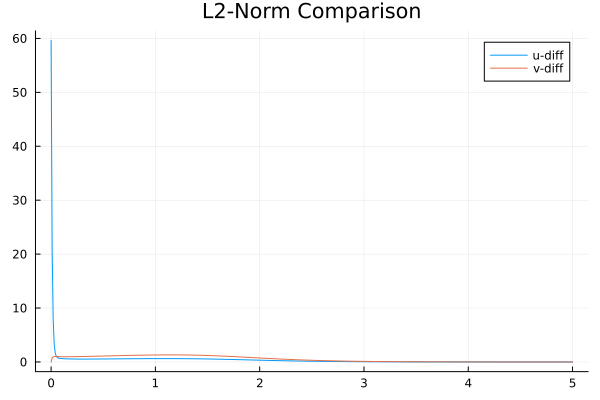

In [19]:
plotcomparenorms(u2, ulimit, v2, vlimit, p, ts, "u-diff", "v-diff")